Net(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.3627, 0.5087]], requires_grad=True), Parameter containing:
tensor([0.4194], requires_grad=True)]


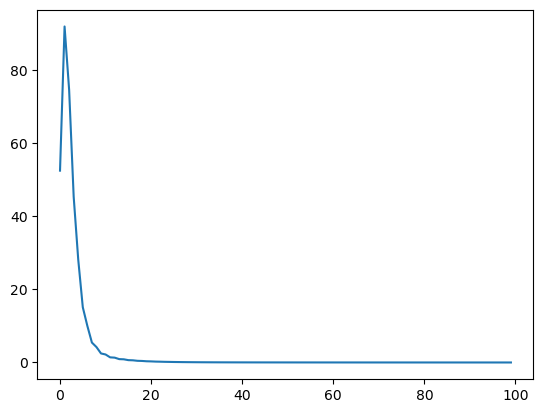

In [16]:
### Training with manually updating W with "Backward" ###

import torch
#from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim




data = [(1.0,2.1,3.0), (2.0, 3.5, 6.0), (3.0, 3.0, 9.0), (4.0, 2.1, 12.0), (5.0, 7.2, 15.0), (6.0, 10.1, 18.0)]


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear = nn.Linear(2, 1)
        
    def forward(self, x):
        return self.linear(x)
    
net = Net()

print(net)
print(list(net.parameters()))

#input = torch.randn(1)
#out = net(input)

#def criterion(out, label):
#    return (label - out)**2
criterion = nn.MSELoss()


optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)
#optimizer = optim.Adam(net.parameters(), lr=0.005)

epoch = 100
batch_size = 3
loss_history = []

for i in range(epoch):
    for j in range(0, len(data), batch_size):
        running_loss = 0.0
        samples = data[j: j + batch_size]
        inputs = torch.tensor([x[:2] for x in samples], dtype=torch.float)
        labels = torch.tensor([x[2] for x in samples], dtype=torch.float).unsqueeze(1)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    loss_history.append(running_loss)
    # print("Epoch {} loss: {}".format(i, loss_history[i]))
    
plt.plot(loss_history)

In [18]:
# inference
for i, current_data in enumerate(data):
    inputs = torch.tensor(current_data[:2], dtype=torch.float)
    labels = torch.tensor(current_data[2], dtype=torch.float)
    output = net(inputs)  
    print("when x = {}, label = {},  y = {}".format(inputs, labels, output))

when x = tensor([1.0000, 2.1000]), label = 3.0,  y = tensor([3.2072], grad_fn=<AddBackward0>)
when x = tensor([2.0000, 3.5000]), label = 6.0,  y = tensor([6.1614], grad_fn=<AddBackward0>)
when x = tensor([3., 3.]), label = 9.0,  y = tensor([9.0795], grad_fn=<AddBackward0>)
when x = tensor([4.0000, 2.1000]), label = 12.0,  y = tensor([11.9901], grad_fn=<AddBackward0>)
when x = tensor([5.0000, 7.2000]), label = 15.0,  y = tensor([15.0144], grad_fn=<AddBackward0>)
when x = tensor([ 6.0000, 10.1000]), label = 18.0,  y = tensor([17.9971], grad_fn=<AddBackward0>)
